1) Pesquise e descreva como calcular as distâncias apresentadas e o
conceito por trás delas.

Uma tarefa fundamental para a utilização do algoritmo KNN é o cálculo da distância entre os seus elementos. Entre as diversas técnicas que existe para calcular a distância podemos citar: Euclidiana, Hamming, Manhattan e Mahalanobis.

A distância Euclidiana pode ser descrita pela equação:

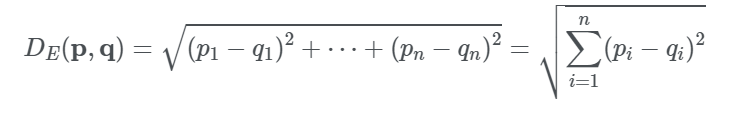

Distância de Manhattan, que vem da ideia de  vem da ideia de calcular a distância de quarteirões que deve ser percorrido por um carro entre dois pontos na cidade de Manhattan, o que justifica o seu nome:

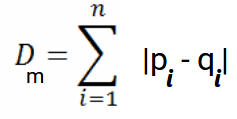

Distância de Mahalanobis:

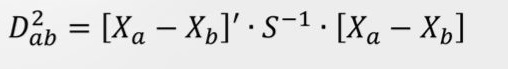

Distância de Hamming:

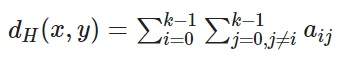



2) Pesquise e descreva estratégias para esolher o melhor valor para k.


O valor K influência muito na boa classificação do algoritmo KNN, sendo de modo geral encontrado o valor ideal por meio da tentativa e erro, onde são testados vários valores diferentes e observado o que tem a melhor acurácia para os valores de treino e teste. De modo geral, alguns pontos podem ser considerado na busca pela melhor perfomance: adotar valores menores é aceitável caso os dados possua pouco ruído, dados com muito ruído é indicado valores maiores estando normalmente entre 1 e 20, sendo recomendando ainda a escolha de valores ímpares para K de modo a evitar loops.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

#Armazenando os atributos na matriz X
xIris = iris.data
#Armazenando o vetor alvo em Y
yIris = iris.target
yIris = yIris.reshape(-1,1)
print(iris['feature_names'])

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Precision: 0.9714285714285714
Recall: 0.9666666666666667


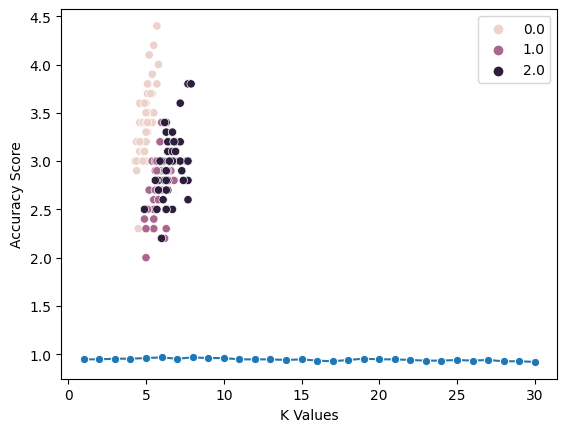

In [24]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333


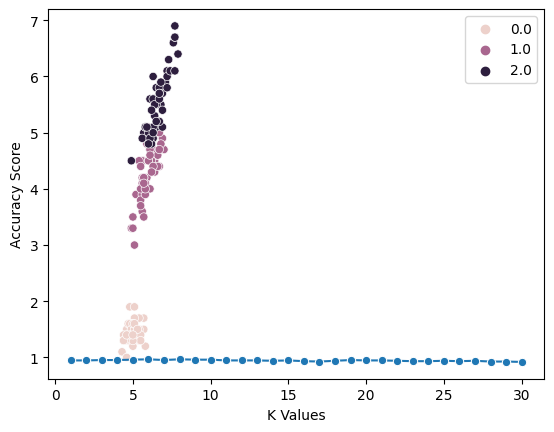

In [25]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['petal length (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667


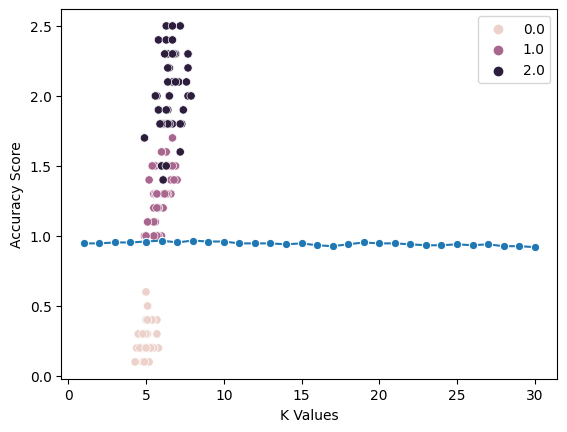

In [26]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['petal width (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333
Precision: 0.9435897435897436
Recall: 0.9333333333333333


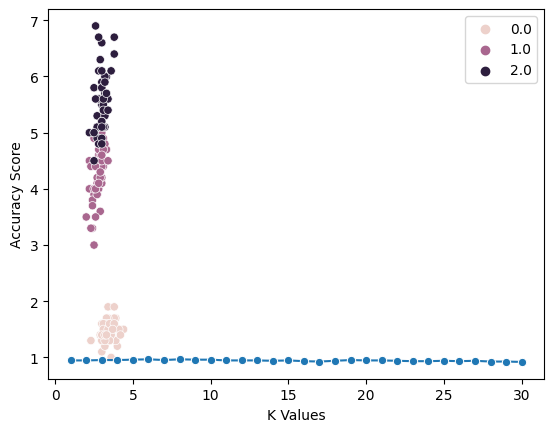

In [27]:
sns.scatterplot(x=df['sepal width (cm)'],y=df['petal length (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


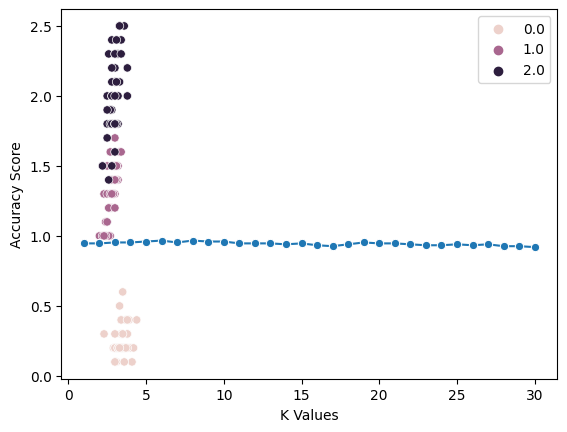

In [29]:
sns.scatterplot(x=df['sepal width (cm)'],y=df['petal width (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333


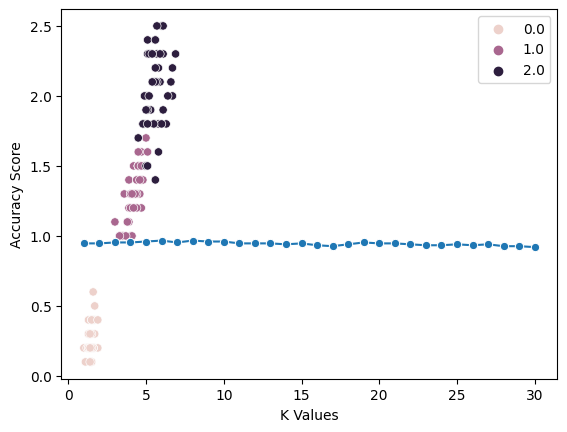

In [30]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'], hue=df['target'])

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'setosa', 'versicolor', 'virginica'
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

# [None, 'micro', 'macro', 'weighted']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)